# Ingeniería de datos

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import functools
import operator

GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)
SYSARMY_2020_2_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=SYSARMY_2020_2_GID))

# Missings
Veamos qué variables presentan valores nulos

In [2]:
df.isna().apply(lambda c: functools.reduce(operator.or_, c))

anios_estudiados                              False
barrio                                         True
categoria_de_trabajo                           True
edad                                          False
educacion_alcanzada                           False
estado_marital                                False
ganancia_perdida_declarada_bolsa_argentina    False
genero                                        False
horas_trabajo_registradas                     False
religion                                      False
rol_familiar_registrado                       False
tiene_alto_valor_adquisitivo                  False
trabajo                                        True
dtype: bool

Se puede ver que los únicos missing values se deben a las categorías: 'barrio', 'categoría_de_trabajo' y 'trabajo'

Veamos si hay diferencias significativas entre los valores inválidos y si posee un valor adquisitivo alto.

### Barrio

Veamos la cantidad de personas que no ingresaron un barrio

<AxesSubplot:ylabel='barrio'>

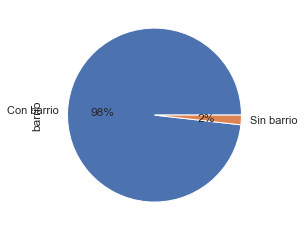

In [3]:
df['barrio'].notnull().apply(lambda x: 'Con barrio' if x else 'Sin barrio').value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

Por lo que se ve que se trata de un 2% del data set, un valor que considero es suficientemente grande como para no descartarlo.

### Diferencia cuantitativa

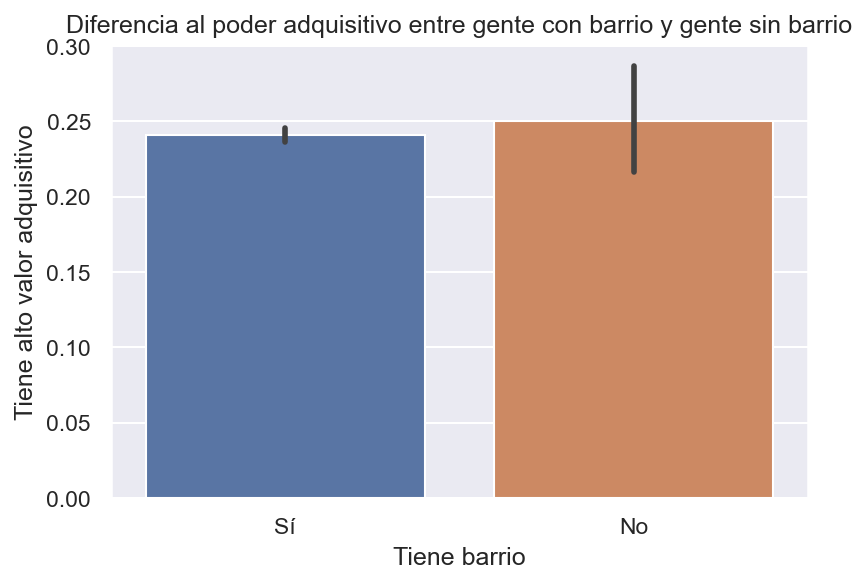

In [4]:
df_test_barrio = df[['barrio', 'tiene_alto_valor_adquisitivo']].copy()
df_test_barrio['tiene_barrio'] = df_test_barrio['barrio'].isna().apply(lambda x: 'No' if x else 'Sí')
del df_test_barrio['barrio']

plt.figure(dpi=150)
ax = sns.barplot(data=df_test_barrio, x='tiene_barrio', y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tiene barrio")
plt.title('Diferencia al poder adquisitivo entre gente con barrio y gente sin barrio')
plt.show()

Se puede notar que haber ingresado barrio o no haberlo hecho a priori no tiene ningún peso directo significativo sobre la variable objetivo.

Consideramos que lo mejor sería asignarles será asignarles un valor de barrio de manera aleatoria considerando la densidad previa de los barrios.

In [99]:
data_set_mejorado = df.copy()
barrios = df['barrio'].dropna()
cantidad = df['barrio'].isna().value_counts()[True]
muestra = barrios.sample(cantidad)
it = iter(muestra)
data_set_mejorado['barrio'] = data_set_mejorado['barrio'].apply(lambda x: next(it) if str(x) == 'nan' else x)

### Categoría de trabajo

Haré un primer análisis similar al de barrio

<AxesSubplot:ylabel='categoria_de_trabajo'>

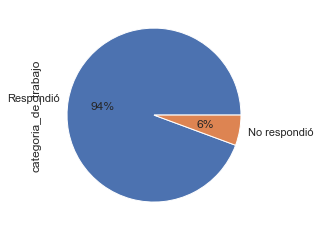

In [100]:
df['categoria_de_trabajo'].notnull().apply(lambda x: 'Respondió' if x else 'No respondió').value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

Nuevamente estamos frente a un caso donde no podemos desestimar esta información pues representa gran parte de nuestro data set

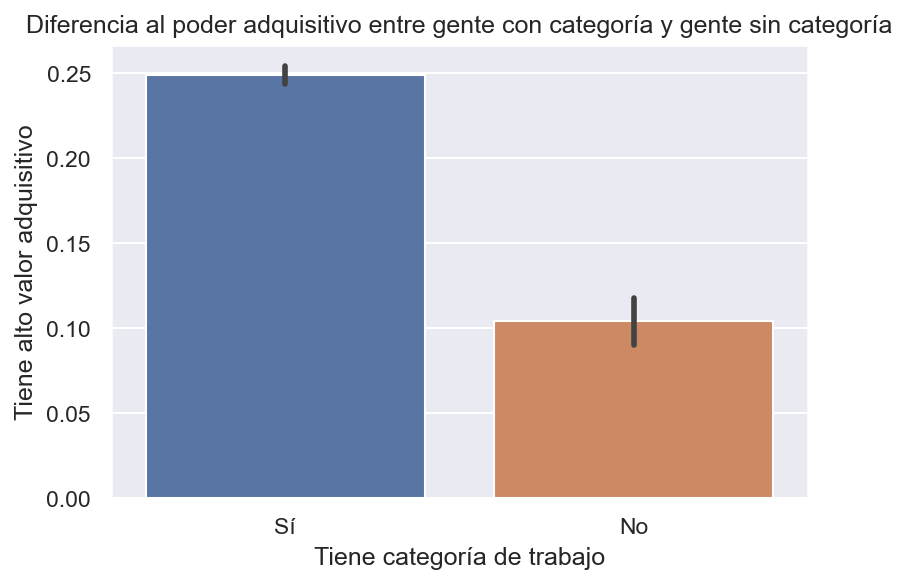

In [101]:
df_test_categoria = df[['categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
df_test_categoria['tiene_categoria'] = df_test_categoria['categoria_de_trabajo'].isna().apply(lambda x: 'No' if x else 'Sí')
del df_test_categoria['categoria_de_trabajo']

plt.figure(dpi=150)
ax = sns.barplot(data=df_test_categoria, x='tiene_categoria', y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tiene categoría de trabajo")
plt.title('Diferencia al poder adquisitivo entre gente con categoría y gente sin categoría')
plt.show()

Aquí ya se puede ver información iteresante: la gente que no responde su categoría de trabajo en general tiene menor valor adquisitivo.

Relación entre valores nulos en trabajo y valores nulos en categoría de trabajo

In [104]:
df[['categoria_de_trabajo', 'trabajo']].isna().apply(lambda column: column.value_counts()[True])

categoria_de_trabajo    1836
trabajo                 1843
dtype: int64

Hay una diferencia de 7 entradas, que serán las siguientes:

In [103]:
df[df['categoria_de_trabajo'].notnull() & df['trabajo'].isna()]

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
5361,10,Palermo,sin_trabajo,18,1_anio,sin_matrimonio,0,hombre,40,cristianismo,con_hijos,0,NaN
10845,8,Palermo,sin_trabajo,23,7-8_grado,divorciado,0,hombre,35,cristianismo,sin_familia,0,NaN
14772,10,Palermo,sin_trabajo,17,1_anio,sin_matrimonio,0,hombre,30,cristianismo,con_hijos,0,NaN
20337,11,Palermo,sin_trabajo,18,2_anio,sin_matrimonio,0,mujer,10,cristianismo,con_hijos,0,NaN
23232,14,Palermo,sin_trabajo,20,5_anio,sin_matrimonio,0,hombre,40,judaismo,con_hijos,0,NaN
32304,13,Palermo,sin_trabajo,30,4_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,NaN
32314,14,Palermo,sin_trabajo,18,5_anio,sin_matrimonio,0,hombre,4,cristianismo,con_hijos,0,NaN


Esto quiere decir que tener un valor NA en categoria_de_trabajo tiene un valor NA trabajo, y si hay un NA en trabajo salvo estos últimos 7 casos hay un NA en categoria.



Discutido: cambiar 'sin_trabajo' por valor NUll y luego tomarlo como "No_respondió"

In [105]:
data_set_mejorado['categoria_de_trabajo'] = data_set_mejorado['categoria_de_trabajo'].apply(lambda x: 'Sin categoria' if str(x) == 'nan' else x)

In [119]:
data_set_mejorado['trabajo'] = data_set_mejorado['trabajo'].apply(lambda x: 'No responde' if str(x) == 'nan' else x)

In [109]:
data_set_mejorado = data_set_mejorado[data_set_mejorado.categoria_de_trabajo != 'sin_trabajo']

# Relación entre educacion_alcanzada y anios_estudiados

En este caso queremos ver si educación alcanzada es una columna determinísitica para anios_estudiados


In [112]:
df[['anios_estudiados', 'educacion_alcanzada']].groupby('educacion_alcanzada').aggregate(set)

,anios_estudiados
educacion_alcanzada,
1-4_grado,{4}
1_anio,{10}
2_anio,{11}
3_anio,{12}
4_anio,{13}
5-6_grado,{6}
5_anio,{14}
7-8_grado,{8}
9_grado,{9}


Comprobando nuestra suposición, la columna educacion_alcanzada posee la misma informacion que anios_estudiados.

Una interpretacion de esto es que la gente que esta cargada en este set de datos nunca repitio un año escolar ni se atraso en la carrera universitaria.

Mi propuesta es eliminar la columna educacion_alcanzada ya que es una variable categoria (más difícil de manipular) con orden impuesto directamente por la columna anios_estudiados.


Por lo que:

In [ ]:
del data_set_mejorado['educacion_alcanzada']

## Valores en rol_familiar_registrado

El valor de soltero está unificado y el valor de casado está separado, propongo unificarlos.

In [115]:
df['rol_familiar_registrado'].unique()

array(['sin_familia', 'casado', 'casada', 'con_hijos', 'soltero_a',
       'otro'], dtype=object)

In [118]:
data_set_mejorado['rol_familiar_registrado'] = data_set_mejorado['rol_familiar_registrado'].apply(lambda x : 'casado' if x == 'casada' else x)

In [117]:
df['rol_familiar_registrado'].unique()

array(['sin_familia', 'casado', 'con_hijos', 'soltero_a', 'otro'],
      dtype=object)

# Código completo

In [114]:
def feature_engineering(df):
    # Missings en barrio
    data_set_mejorado = df.copy()
    barrios = df['barrio'].dropna()
    cantidad = df['barrio'].isna().value_counts()[True]
    muestra = barrios.sample(cantidad)
    it = iter(muestra)
    data_set_mejorado['barrio'] = data_set_mejorado['barrio'].apply(lambda x: next(it) if str(x) == 'nan' else x)

    # Missings en categoría de trabajo
    data_set_mejorado['categoria_de_trabajo'] = data_set_mejorado['categoria_de_trabajo'].apply(lambda x: 'Sin categoria' if str(x) == 'nan' else x)

    # Missings en trabajo
    data_set_mejorado['trabajo'] = data_set_mejorado['trabajo'].apply(lambda x: 'No responde' if str(x) == 'nan' else x)

    # Eliminación de categoría "sin trabajo"
    data_set_mejorado = data_set_mejorado[data_set_mejorado.categoria_de_trabajo != 'sin_trabajo']

    # Eliminación de el atributo eduación alcanzada
    del data_set_mejorado['educacion_alcanzada']

    # Juntamos casado y casada en una misma categoría.
    data_set_mejorado['rol_familiar_registrado'] = data_set_mejorado['rol_familiar_registrado'].apply(lambda x : 'casado' if x == 'casada' else x)
    
    return data_set_mejorado

,anios_estudiados,barrio,categoria_de_trabajo,edad,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,Palermo,relacion_de_dependencia,27,matrimonio_civil,0,mujer,38,cristianismo,casada,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento
32559,13,Palermo,relacion_de_dependencia,22,sin_matrimonio,0,hombre,20,cristianismo,con_hijos,0,entretenimiento
